
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




odruda,id,vynos_2022,vynos_2023,typ_hnojiva,zlepseni,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>
A,16,5,7.75,synteticke,2.75,TRUE,FALSE


odruda,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,0.5381818,0.52000,-0.57,1.7800,0.5514514,0.3540508,0.6716412
B,0.3294000,0.28000,-0.62,1.3200,0.4592766,0.3339221,0.1576341
C,0.5273050,0.51975,-0.73,1.6645,0.5494186,0.3962977,0.8597575
D,0.5067000,0.48500,-0.70,1.5800,0.4626036,0.7489013,0.5377519


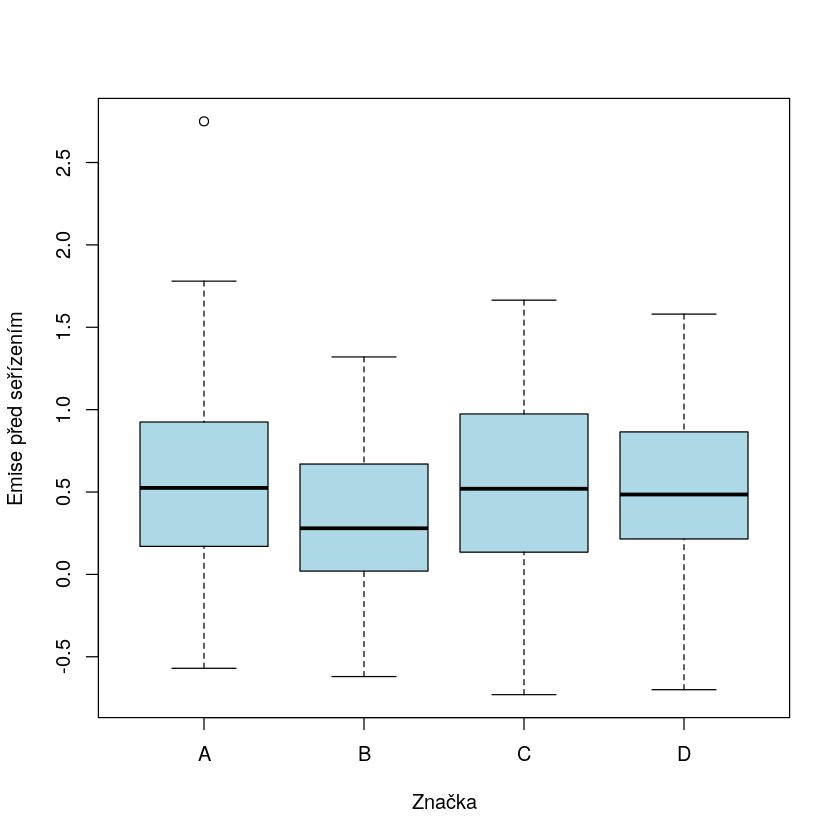

In [2]:
library(readxl)
library(dplyr)
library(ggplot2)
library(rstatix)
library(tidyr)

# Load the data
data <- read_excel("data_20240603_A.xlsx")


# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$vynos_2023 - data$vynos_2022)

boxplot(data$zlepseni ~ data$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

outliers <- data %>%
    group_by(odruda) %>%
    rstatix::identify_outliers(zlepseni)

outliers

data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
data <- na.omit(data)
summry <- data %>%
    group_by(odruda) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry


# 4

In [3]:
A <- data$zlepseni[data$odruda == "A"]
B <- data$zlepseni[data$odruda == "B"]

### b)

In [4]:
t.test(A)
t.test(B)


	One Sample t-test

data:  A
t = 9.7104, df = 98, p-value = 5.146e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.4281968 0.6481669
sample estimates:
mean of x 
0.5381818 



	One Sample t-test

data:  B
t = 7.1721, df = 99, p-value = 1.357e-10
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.2382696 0.4205304
sample estimates:
mean of x 
   0.3294 


### c,d)

In [10]:
var.test(A, B, ratio = 1)$p.value
t.test(A, B, var.equal = TRUE, alternative = "greater")

[1] 0.07083774


	Two Sample t-test

data:  A and B
t = 2.9032, df = 197, p-value = 0.002057
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.08993525        Inf
sample estimates:
mean of x mean of y 
0.5381818 0.3294000 


In [5]:
0.5381818 - 0.3294000

[1] 0.2087818

# 5

In [11]:
bartlett.test(zlepseni ~ odruda, data = data)


	Bartlett test of homogeneity of variances

data:  zlepseni by odruda
Bartlett's K-squared = 6.1673, df = 3, p-value = 0.1038


In [12]:
tab <- aov(zlepseni ~ odruda, data = data)
summary(tab)

             Df Sum Sq Mean Sq F value Pr(>F)  
odruda        3   2.89  0.9631   3.738 0.0113 *
Residuals   395 101.75  0.2576                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [13]:
TukeyHSD(tab)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zlepseni ~ odruda, data = data)

$odruda
           diff          lwr         upr     p adj
B-A -0.20878182 -0.394437110 -0.02312653 0.0204016
C-A -0.01087682 -0.196532110  0.17477847 0.9987680
D-A -0.03148182 -0.217137110  0.15417347 0.9719529
C-B  0.19790500  0.012716766  0.38309323 0.0309165
D-B  0.17730000 -0.007888234  0.36248823 0.0662424
D-C -0.02060500 -0.205793234  0.16458323 0.9917474
